In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import meteva.base as meb
import meteva.product as mpd
import numpy as np
import datetime


Bad key "text.kerning_factor" on line 4 in
s:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution
s:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


本模块函数只要用于展示单个起报时刻，单个预报时效的预报场（网格）同观测（站点或网格）的空间分布对比

In [2]:
#降水预报和实况的测试数据
grid0 = meb.grid([73,135,0.25],[18,55,0.25])
grd_fo = meb.read_griddata_from_micaps4(r'H:\test_data\input\mpd\ec_rain24_BT19123008.024',grid = grid0)
meb.set_griddata_coords(grd_fo,gtime = [datetime.datetime(2019,12,30,8,0)],dtime_list= [24],member_list= ["ECMWF"])
sta = meb.read_stadata_from_micaps3(r'H:\test_data\input\mpd\ob_rain24_BT19123108.000')
sta_ob = meb.between_value_range(sta, 0, 1000)

In [3]:
print(sta_ob)  #打印降水观测数据

      level                time  dtime     id     lon    lat  data0
0         0 2019-12-31 08:00:00      0  45004  114.17  22.31    0.0
1         0 2019-12-31 08:00:00      0  45005  114.17  22.30    0.0
2         0 2019-12-31 08:00:00      0  45007  113.91  22.30    0.0
7         0 2019-12-31 08:00:00      0  45032  114.15  22.52    0.0
8         0 2019-12-31 08:00:00      0  45035  113.98  22.47    0.0
...     ...                 ...    ...    ...     ...    ...    ...
2736      0 2019-12-31 08:00:00      0  59981  112.33  16.83    0.0
2737      0 2019-12-31 08:00:00      0  59985  111.62  16.53    0.0
2738      0 2019-12-31 08:00:00      0  59993  114.22  10.21    0.4
2739      0 2019-12-31 08:00:00      0  59994  114.29   9.71    0.4
2740      0 2019-12-31 08:00:00      0  59996  114.50   9.91    0.0

[2444 rows x 7 columns]


In [4]:
print(grd_fo)   #打印降水预报数据

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 149, lon: 249)>
array([[[[[[0. , ..., 0.8],
           ...,
           [0.3, ..., 8.2]]]]]])
Coordinates:
  * member   (member) <U5 'ECMWF'
  * level    (level) float64 0.0
  * time     (time) datetime64[ns] 2019-12-30T08:00:00
  * dtime    (dtime) int32 24
  * lat      (lat) float64 18.0 18.25 18.5 18.75 19.0 ... 54.25 54.5 54.75 55.0
  * lon      (lon) float64 73.0 73.25 73.5 73.75 ... 134.2 134.5 134.8 135.0


# 降水预报和观测分布对比图   
**rain_24h_sg(sta_ob,grd_fo,save_path=None,show  = False,add_county_line = False):**  
根据输入的站点观测数据和网格预报数据，绘制对比图 


# 降水预报和观测分布综合对比图 
**rain_24h_comprehensive_sg(sta_ob,grd_fo, save_path=None,show = False,add_county_line = False):**  
根据输入的站点观测数据和网格预报数据，绘制对比图 

# 降水预报和观测分布综合对比图（中国范围） 
**rain_24h_comprehensive_chinaland_sg(sta_ob,grd_fo,  save_path=None,show = False,add_county_line = False):**  
根据输入的站点观测数据和网格预报数据，绘制对比图 


|参数|说明（上述三个函数参数意义和用法完全相同）|  
|:--|:--|  
|**sta_ob**|实况[站点数据](https://www.showdoc.cc/meteva?page_id=3975600580125986),数据中只能有单个起报时刻，单个时效的数据|   |**grd_fo**|预报[网格数据](https://www.showdoc.cc/meteva?page_id=3975600815874861),数据中只能有单个起报时刻，单个时效的数据| 
|**save_path**| 图片输出文件路径|  
|**show**| 是否在屏幕显示图片，如果save_path  为None时，程序内部会自动将show设置True|  
|**add_county_line**| 绘制底图时是否添加县界|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**

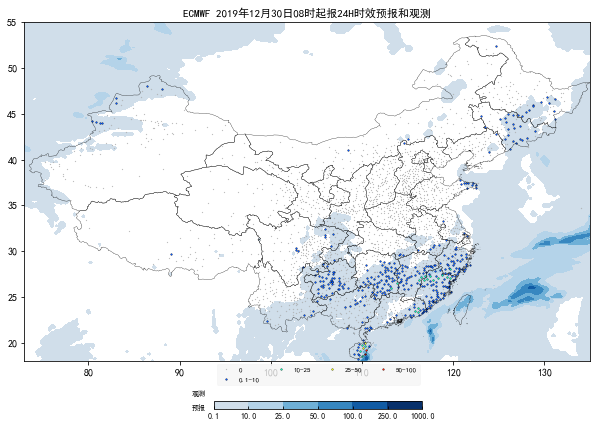

In [5]:
mpd.rain_24h_sg(sta_ob,grd_fo,r"H:\test_data\output\mpd\program\rain_24h_sg.png",show = True)

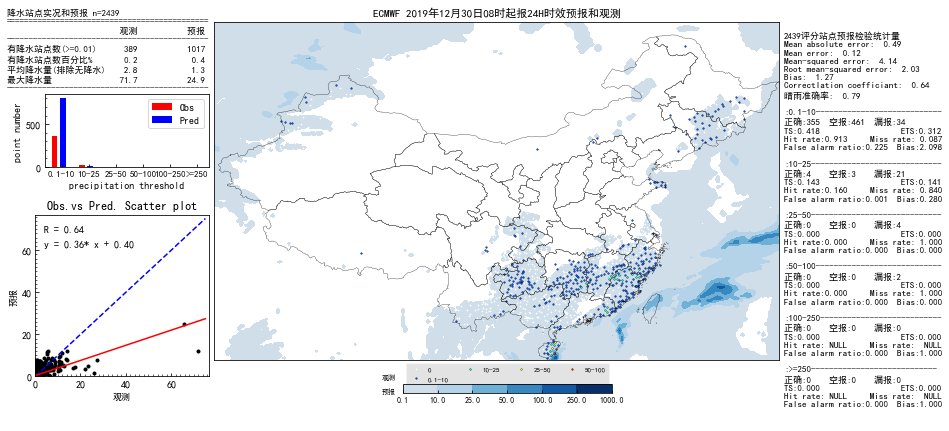

In [6]:
mpd.rain_24h_comprehensive_sg(sta_ob,grd_fo,r"H:\test_data\output\mpd\program\rain_24h_comp.png",show = True)

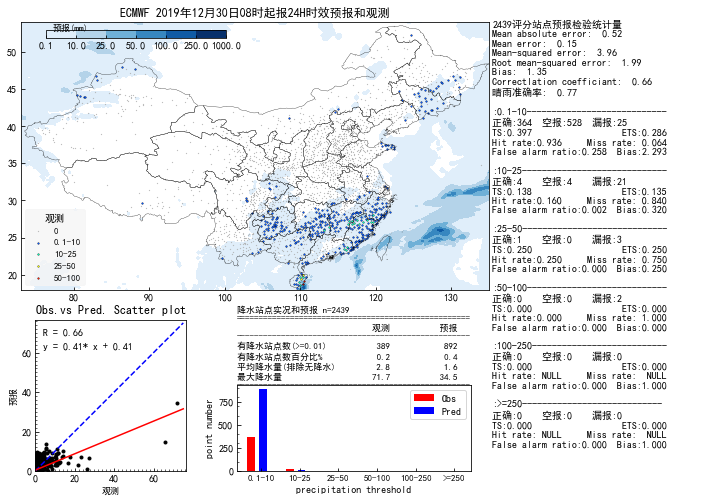

In [7]:
mpd.rain_24h_comprehensive_chinaland_sg(sta_ob,grd_fo,r"H:\test_data\output\mpd\program\rain_24h_comp_c.png",show = True)

In [8]:
grid_jx = meb.grid([113,119,0.25],[24,31,0.25])
grd_fo_jx = meb.interp_gg_linear(grd_fo,grid_jx)
print(grd_fo_jx)

<xarray.DataArray 'data0' (member: 1, level: 1, time: 1, dtime: 1, lat: 29, lon: 25)>
array([[[[[[ 0. , ..., 13.5],
           ...,
           [ 0. , ...,  0.1]]]]]])
Coordinates:
  * member   (member) <U5 'ECMWF'
  * level    (level) float64 0.0
  * time     (time) datetime64[ns] 2019-12-30T08:00:00
  * dtime    (dtime) int32 24
  * lat      (lat) float64 24.0 24.25 24.5 24.75 25.0 ... 30.25 30.5 30.75 31.0
  * lon      (lon) float64 113.0 113.2 113.5 113.8 ... 118.2 118.5 118.8 119.0


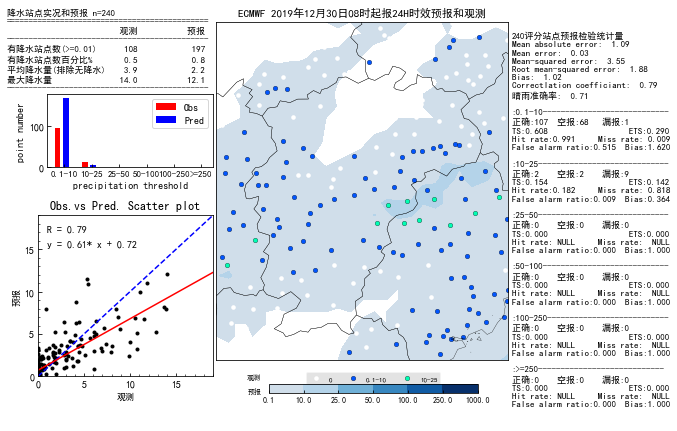

In [9]:
mpd.rain_24h_comprehensive_sg(sta_ob,grd_fo_jx,r"H:\test_data\output\mpd\program\rain_24h_jx.png",show = True)

# 温度预报和零场分布对比图   
**temper_gg(grd_ob,grd_fo,save_path = None,show = False,add_county_line = False):**  
根据输入的站点观测数据和网格预报数据，绘制对比图 


# 温度预报和零场分布综合对比图 
**temper_comprehensive_gg(grd_ob,grd_fo,save_path = None,show = False,add_county_line = False):**  
根据输入的站点观测数据和网格预报数据，绘制对比图 



|参数|说明（上述两个函数参数意义和用法完全相同）|  
|:--|:--|  
|**grd_ob**|实况[网格数据](https://www.showdoc.cc/meteva?page_id=3975600815874861),数据中只能有单个起报时刻，单个时效的数据|   |**grd_fo**|预报[网格数据](https://www.showdoc.cc/meteva?page_id=3975600815874861),数据中只能有单个起报时刻，单个时效的数据| 
|**save_path**| 图片输出文件路径|  
|**show**| 是否在屏幕显示图片，如果save_path  为None时，程序内部会自动将show设置True|  
|**add_county_line**| 绘制底图时是否添加县界|  
|<font face="黑体" color=blue size=3>return</font>|无返回值|  
  
**调用示例：**

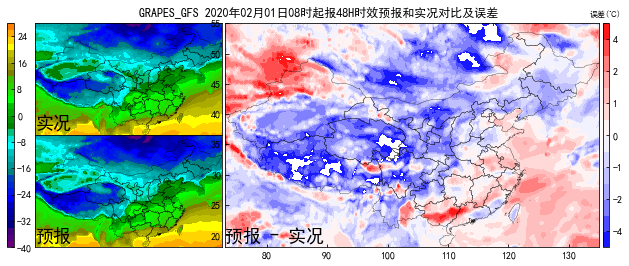

In [10]:
grd_fo48 = meb.read_griddata_from_nc(r'H:\test_data\input\mpd\grapes_t2m_BT20020108.048.nc',
                                     grid = grid0,time = "2020020108",dtime = 48,data_name = "GRAPES_GFS") 
grd_fo00 = meb.read_griddata_from_nc(r'H:\test_data\input\mpd\grapes_t2m_BT20020308.000.nc',
                                     grid = grid0,time = "2020020308",dtime = 0,data_name = "GRAPES_GFS")
mpd.temper_gg(grd_fo00,grd_fo48,r"H:\test_data\output\mpd\program\temp.png",show = True)

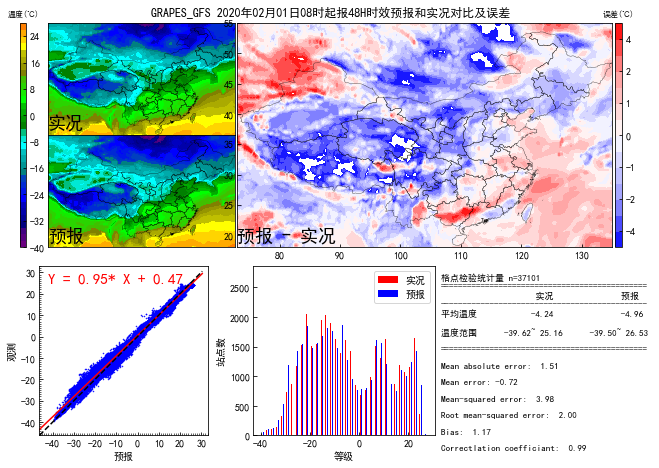

In [12]:
mpd.temper_comprehensive_gg(grd_fo00,grd_fo48,r"H:\test_data\output\mpd\program\temp_comp.png",show = True)